In [33]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import transforms
from matplotlib.transforms import Affine2D
from random import gauss
import pandas as pd

In [510]:
#Parametros
me = 0.59/1000. # masa en kilogramos de la esfera
r = (0.25/100) #radio de la esfera en metros
#r = (0.35/100)

#largo cilíndrico de la esfera
h = (0.87/100) - 2*r 
#h = (2.04/100) - 2*r
#h = (2.19/100) - 2*r
#h = (2.33/100) - 2*r
#h = (3.12/100) - 2*r
#h = (3.58/100) - 2*r

#masa en kilogramos de la pildora
mp = 0.062/1000.  
#mp = 0.104/1000.
#mp = 0.105/1000.
#mp = 0.132/1000.
#mp = 0.149/1000.
#mp = 0.200/1000.

alpha = (np.pi*(20))/180.
g = 9.8

#Valores iniciales
xi = [0]
vi = [0]
xf = [h]
ti = [0]
wlista = []

#Funciones
def t(xf,xi,vi):
    return ((-vi+np.sqrt((vi**2)-2*(g*np.sin(alpha))*(xi-xf)))/(g*np.sin(alpha)))

def V(vi,t):
    return g*t*np.sin(alpha) + vi

def wo(vf):
    return (84*me*r*(h + 4*r)*vf)/(20*(h**3)*mp + 120*(h**2)*mp*r + 84*h*me*(r**2) + 45*h*mp*(r**2) + 336*me*(r**3) + 140*mp*(r**3))

for i in range(0,35):
#for i in range(0,16):
#for i in range(0,15):
#for i in range(0,14):
#for i in range(0,11):
#for i in range(0,9):
    t1 = t(xf[i],xi[i],vi[i])
    v = V(vi[i],t1)
    w1 = wo(v)
    wlista.append(w1)
    #t2 = np.pi/wo
    T = t1 
    ti.append(ti[i]+T)
    vi.append(v)
    xi.append(xf[i])
    xf.append(xf[i]+h+np.pi*r)

print ti

[0, 0.046986920196059906, 0.09540425120102813, 0.1264759725202651, 0.15129564469165935, 0.1725820749104113, 0.1915170307259926, 0.20874140350160234, 0.22464900180845837, 0.23950234756940214, 0.2534868339164239, 0.2667391524442759, 0.2793635193156197, 0.2914415488603617, 0.3030385732540407, 0.31420785693162195, 0.3249935042970561, 0.33543252423251774, 0.34555633229723426, 0.35539186719512106, 0.36496243607548506, 0.37428836506612184, 0.3833875072320282, 0.39227564438708973, 0.400966808672519, 0.40947354265537406, 0.4178071117303539, 0.4259776790985396, 0.43399445107961504, 0.44186579868282894, 0.4495993600121471, 0.4572021270740659, 0.46468051979695496, 0.4720404494918695, 0.4792873735393039, 0.48642634274052443]


In [473]:
title = 'pildora6_20.txt'
archivo = open(title,'w')
for i in wlista:
    archivo.write('{}\n'.format(i))
archivo.close()

In [471]:
Tw1_5 = np.loadtxt('t1_5.txt')
Tw1_10 = np.loadtxt('t1_10.txt')
Tw1_15 = np.loadtxt('t1_15.txt')
Tw1_20 = np.loadtxt('t1_20.txt')

Tw2_10 = np.loadtxt('t2_10.txt')
Tw2_15 = np.loadtxt('t2_15.txt')
Tw2_20 = np.loadtxt('t2_20.txt')

Tw3_10 = np.loadtxt('t3_10.txt')
Tw3_15 = np.loadtxt('t3_15.txt')
Tw3_20 = np.loadtxt('t3_20.txt')

Tw4_15 = np.loadtxt('t4_15.txt')
Tw4_20 = np.loadtxt('t4_20.txt')

Tw5_20 = np.loadtxt('t5_20.txt')

tf1_5 = Tw1_5.sum() + 0.9635958580916306
tf1_10 = Tw1_10.sum() + 0.6826652773294245
tf1_15 = Tw1_15.sum() + 0.5591712236661286
tf1_20 = Tw1_20.sum() + 0.48642634274052443

tf2_10 = Tw2_10.sum() + 0.6542483163329202
tf2_15 = Tw2_15.sum() + 0.5358948869591426
tf2_20 = Tw2_20.sum() + 0.46617812026844585

tf3_10 = Tw3_10.sum() + 0.653570757845291
tf3_15 = Tw3_15.sum() + 0.5353398987076301
tf3_20 = Tw3_20.sum() + 0.4656953327178328

tf4_15 = Tw4_15.sum() + 0.5315306543951959
tf4_20 = Tw4_20.sum() + 0.46238164864204273

tf5_20 = Tw5_20.sum() + 0.4677945407908305

print tf1_5, tf1_10, tf1_15, tf1_20
print tf2_10, tf2_15, tf2_20
print tf3_10, tf3_15, tf3_20
print tf4_15, tf4_20
print tf5_20

1.6688878580916304 1.1776622773294245 0.9634422236661286 0.8375933427405244
1.2475743163329203 1.0057098869591425 0.8690981202684459
1.2853507578452912 1.03087889870763 0.8893463327178328
1.1519586543951958 0.9839536486420428
1.2630995407908305


In [282]:
Tfinal_angulos = [1.6108028580916305,1.1400052773294245,0.9334592236661285,0.8118813427405245]
Tfinal2_angulos = [1.5514487424026913,1.0781223163329203, ]

In [474]:
k = 30*g*(me + mp)*(h+4*r)*(r - ((me*r + mp*((h/2) + r))/(me + mp)))*np.cos(alpha) 
print k

-3.471714684854147e-05


In [475]:
k1 = 30*g*(me + mp)*(h + 4*r)*np.sin(alpha)*r
print k1

8.102635045859619e-06


In [476]:
k2 = 30*g*(me + mp)*(h + 4*r)*np.sin(alpha)*(((me*r + mp*( (h/2) + r)))/(me + mp))
print k2

2.0738643117377407e-05


In [477]:
k3 = 10*(h**3)*mp + 90*(h**2)*mp*r + 3*h*(14*me + 55*mp)*(r**2) + 8*(21*me + 20*mp)*(r**3)
print k3

1.14296424e-07


In [478]:
k4 = 30*h*mp*r*(h + 4*r)
print k4

1.88496e-08


In [96]:
betamin = np.arctan((r)/(h+np.pi*r))
betamax = np.pi - betamin
print betamin, betamax

0.06458643468090325 3.07700621890889


In [220]:
k3 = 10/(5*(h**2)*mp + 20*h*mp*r + 28*me*(r**2) + 30*mp*(r**2))

k4 = (h*mp + 2*me*r + 2*mp*r)*np.cos(alpha)

k5 = (h*mp + 2*me*r + 2*mp*r)*np.sin(alpha)

print k3, k4, k5

27589629.9134 5.137342897354624e-06 5.137342897354623e-06


In [215]:
k6 = (10*(h*mp + 2*me*r + 2*mp*r)*np.cos(alpha)/(
5*(h**2)*mp + 20*h*mp*r + 28*me*(r**2) + 30*mp*(r**2)))

print k6

188.35850869486114


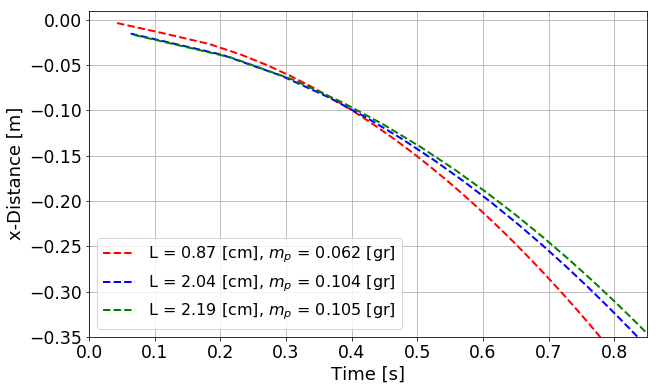

In [525]:
y1 = []
#y2 = []
#y3 = []
y4 = []
y5 = []

t1 = []
#t2 = []
#t3 = []
t4 = []
t5 = []

tinit1 = 0
tinit2 = 0
tinit3 = 0
tinit4 = 0
tinit5 = 0

for i in range(len(xf)-1):
    yn = -xf[i]
    y1.append(yn)
    tinit1 += Tw1_20[i]
    tn = ti[i] + tinit1
    t1.append(tn)

fig=plt.figure(figsize=(10,6))
#plt.title('Parabolas for different drop heights ', fontsize = 22)
plt.xlabel('Time [s]', linespacing=1, fontsize = 18)
plt.ylabel('x-Distance [m]', linespacing=1, fontsize = 18)

plt.plot(t1, y1, linestyle='--',color='red', linewidth=2, label = 'L = 0.87 [cm], $m_p$ = 0.062 [gr]')
plt.plot(t2, y2, linestyle='--',color='blue', linewidth=2, label = 'L = 2.04 [cm], $m_p$ = 0.104 [gr]')
plt.plot(t3, y3, linestyle='--',color='green', linewidth=2, label = 'L = 2.19 [cm], $m_p$ = 0.105 [gr]')

plt.xticks(size = 'xx-large')
plt.yticks(size = 'xx-large')
#plt.legend(loc='upper left', fontsize = 14, shadow=True)
plt.grid(True)
plt.axis([0, 0.85, 0.01, -0.35])
plt.gca().invert_yaxis()
plt.legend(fontsize = 16)
# Mostramos en pantalla
plt.show()

In [533]:
y3

[-0.0169,
 -0.04165398163397448,
 -0.06640796326794896,
 -0.09116194490192343,
 -0.11591592653589791,
 -0.1406699081698724,
 -0.1654238898038469,
 -0.1901778714378214,
 -0.21493185307179588,
 -0.23968583470577037,
 -0.26443981633974484,
 -0.2891937979737193,
 -0.31394777960769377,
 -0.33870176124166823,
 -0.3634557428756427]